# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
hp = movies[movies.title.str.contains('Harry Potter', case=False)]
hp.sort_values("year",ascending = False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
len(movies[(movies.year >= 2000) & (movies.year < 2018)])

106029

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
print(len(movies[movies.title.str.contains('Hamlet', case=False)]))

57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlets = movies[movies.title.str.contains('Hamlet', case=False)]
hamlets = hamlets[hamlets.year >= 2000]
hamlets_sorted = hamlets.sort_values("year")
print(hamlets_sorted)

                                          title  year
55639                                    Hamlet  2000
55525                    Hamlet in the Hamptons  2002
137905                                 Hamlet_X  2003
218468                                 Hamlet X  2004
40045                               Hamlet (II)  2005
152920          Dogg's Hamlet, Cahoot's Macbeth  2005
200246  The Tragedy of Hamlet Prince of Denmark  2007
176528                              Hamlet (II)  2007
156899                             Hamlet (III)  2007
52408                 Hamlet the Vampire Slayer  2008
141237                                 Hamlet 2  2008
191734                           Kitchen Hamlet  2009
1931                                     Hamlet  2009
227953                                   Hamlet  2011
220674                     Hamlet Demonstration  2011
51236                            Hamlet Unbound  2012
17833                             Zombie Hamlet  2012
186136                      

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
inception = cast[cast.title == "Inception"]
print(len(inception[inception.n.isna()]))

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
print(len(inception[inception.n.notnull()]))

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
sorted_main_cast = inception[inception.n.notnull()].sort_values(by="n",ascending=False)
print(sorted_main_cast.head())

             title  year                name     type         character     n
3731263  Inception  2010      Shannon Welles  actress           Old Mal  51.0
833376   Inception  2010         Jack Gilroy    actor          Old Cobb  50.0
2250605  Inception  2010       Jason Tendell    actor  Fischer's Driver  49.0
3473041  Inception  2010  Lisa (II) Reynolds  actress     Private Nurse  48.0
1812091  Inception  2010      Andrew Pleavin    actor       Businessman  47.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
Albus_movies = cast[cast.character.str.contains('Albus Dumbledore')].drop_duplicates('title')
print(Albus_movies.title)

704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
2248085                                          Potter
Name: title, dtype: object


In [23]:
Albus_actors = Albus_movies.drop_duplicates("name")
print(Albus_actors.name)

704984            Dane Farwell
792419          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
KR = cast[cast.name.str.contains("Keanu Reeves")]
KR_roles = KR.drop_duplicates("character")
print(KR_roles[KR_roles['year'] >= 1999].sort_values("year",ascending=True))

                                  title  year          name   type  \
1892370                     Me and Will  1999  Keanu Reeves  actor   
1892390                      The Matrix  1999  Keanu Reeves  actor   
1892397                The Replacements  2000  Keanu Reeves  actor   
1892387                        The Gift  2000  Keanu Reeves  actor   
1892398                     The Watcher  2000  Keanu Reeves  actor   
1892358                       Hard Ball  2001  Keanu Reeves  actor   
1892383                  Sweet November  2001  Keanu Reeves  actor   
1892379          Something's Gotta Give  2003  Keanu Reeves  actor   
1892351                    Ellie Parker  2005  Keanu Reeves  actor   
1892348                     Constantine  2005  Keanu Reeves  actor   
1892400                     Thumbsucker  2005  Keanu Reeves  actor   
1892388                  The Lake House  2006  Keanu Reeves  actor   
1892343                A Scanner Darkly  2006  Keanu Reeves  actor   
1892382             

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [25]:
nineteenth = cast[(cast.year >= 1950) & (cast.year <= 1960)]
nineteenth_crews = nineteenth.drop_duplicates("name")
print(len(nineteenth_crews))

55516


In [26]:
twentieth = cast[(cast.year >= 2007) & (cast.year <= 2017)]
twentieth_crew = twentieth.drop_duplicates("name")
print(len(twentieth_crew))

791489


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [27]:
leading = cast[cast["n"].notnull()]
leading_2000 = leading[leading.year >= 2000].drop_duplicates("character").sort_values(by= 'n',ascending=False)
leading_2000.head(30)

,title,year,name,type,character,n
2015838,Freer,2017,Roque (III) Santos,actor,Candy Seller,999.0
1573585,Rogue,2002,Frank Montella,actor,Pyotr Yeftushenko,910.0
102704,Ramasakkani Rakumarudu,2016,Koteshwar Avvari,actor,Shankara Sastry,711.0
1720151,Eye on Juliet,2017,Hamid Ouahi,actor,Village policeman #2,621.0
502,Eye on Juliet,2017,Mohamed Ben Aamara,actor,Village policeman #1,620.0
3383242,Eye on Juliet,2017,Fatiha Ouaassem,actress,Sheeo shepherd's woman,619.0
3383457,Eye on Juliet,2017,Zahra Ait Oumghar,actress,Ridha's house domestic,618.0
92382,Eye on Juliet,2017,Mohammed Assbab,actor,Grand taxi driver,617.0
1854243,Eye on Juliet,2017,Mounir Quellouch,actor,TCO security guard,616.0
111856,Eye on Juliet,2017,Badr,actor,Shepherd's 6 years old boy #2,615.0


[(0.0, 100.0)]

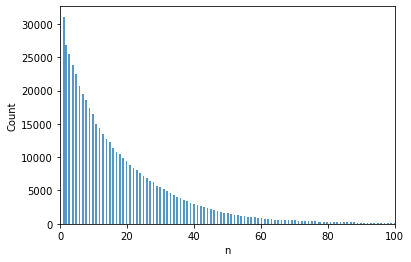

In [28]:
import seaborn
hist = seaborn.histplot(leading_2000.n)
hist.set(xlim=(0, 100))

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [29]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

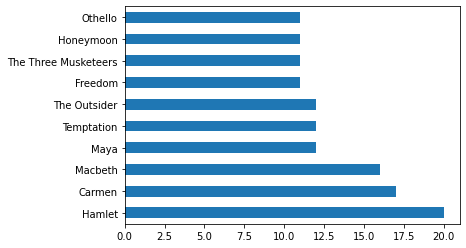

In [30]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [31]:
print(movies[movies.year >= 2000].year.value_counts().sort_values(ascending=False)[:3])

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [32]:
import math
def cal_decade(year):
    year_div_10 = math.floor(year / 10)
    return year_div_10 * 10

In [33]:
movies_sort_yr = movies.sort_values(by='year')
movies_sort_yr["decade"] = movies_sort_yr.year.apply(cal_decade)
print(movies_sort_yr.decade.value_counts())

2010    75733
2000    39452
1990    22992
1980    21034
1970    19526
1960    17976
1950    12934
1930    10388
1920     9034
1940     8718
1910     6799
2020      285
1900       39
1890        3
2110        1
Name: decade, dtype: int64


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [34]:
print(cast.name.value_counts().sort_values(ascending=False)[:10])

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Lee Phelps         624
Harold Miller      624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64


In [35]:
Herself = cast[cast.character == 'Herself']
print(Herself.name.value_counts()[:10])

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64


In [36]:
Himself = cast[cast.character == 'Himself']
print(Himself.name.value_counts()[:10])

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [37]:
cast[cast.character.str.startswith('Zombie')].name.value_counts()[:10]

John (II) Migliore    9
Colin Murtagh         7
S. William Hinzman    4
Clive McKenzie        4
Steve Hutsko          3
Richard Ricci         3
Rudy Ricci            3
Samuel R. Solito      3
Edward X. Young       3
Raquel Long           3
Name: name, dtype: int64

In [38]:
cast[cast.character.str.startswith('Police')].name.value_counts()[:10]

Brick Sullivan    93
Chuck Hamilton    82
Lee Phelps        76
Frank O'Connor    72
Wade Boteler      70
Robert Homans     69
Dick Rush         68
Edgar Dearing     59
Jagdish Raj       58
James Flavin      57
Name: name, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [44]:
KR = cast[cast.name == "Keanu Reeves"].year.value_counts().sort_index()

In [61]:
KR.tolist()

[1,
 3,
 4,
 2,
 2,
 3,
 1,
 4,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 3,
 1,
 1]

<BarContainer object of 29 artists>

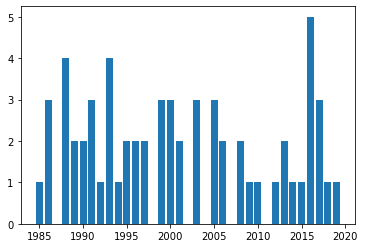

In [62]:
plt.bar(KR.index, KR.tolist())

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [76]:
Kr = cast[cast.name == "Keanu Reeves"][['year','n']]
Kr.head()

,year,n
1892342,2013,1.0
1892343,2006,4.0
1892344,1995,1.0
1892345,1991,1.0
1892346,1989,1.0


In [77]:
Kr.isna().any()

year    False
n        True
dtype: bool

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?